In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)

In [6]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [10]:
df['host_id'] = df['host_id'].astype('str')
df['id'] = df['id'].astype('str')
df['latitude'] = df['latitude'].astype('str')
df['longitude'] = df['longitude'].astype('str')

In [11]:
df.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                           object
longitude                          object
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [13]:
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [14]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.975,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


CATEGORICAL

In [15]:
df['neighbourhood_group'].value_counts()

Manhattan        16621
Brooklyn         16439
Queens            4572
Bronx              875
Staten Island      314
Name: neighbourhood_group, dtype: int64

In [16]:
df['neighbourhood_group'].value_counts(normalize=True)

Manhattan        0.428145
Brooklyn         0.423456
Queens           0.117771
Bronx            0.022539
Staten Island    0.008088
Name: neighbourhood_group, dtype: float64

In [17]:
df['room_type'].value_counts()

Entire home/apt    20321
Private room       17654
Shared room          846
Name: room_type, dtype: int64

In [18]:
df[(df['neighbourhood_group'] == 'Queens') & (df['room_type'] == 'Private room')]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
46,12937,"1 Stop fr. Manhattan! Private Suite,Landmark B...",50124,Orestes,Queens,Long Island City,40.74771,-73.9474,Private room,130,3,248,2019-07-01,2.25,1,215
77,18198,Little King of Queens,70091,Justin,Queens,Woodside,40.75038,-73.90334,Private room,70,30,25,2019-05-31,0.22,1,324
143,32363,Fully Furnished Basement Apartment,140025,Fredah,Queens,Flushing,40.74028,-73.83168,Private room,140,2,1,2011-09-19,0.01,1,1
161,39593,"A room w/ a Manhattan view, longer stay",110506,Myung,Queens,Sunnyside,40.74559,-73.92313,Private room,79,30,28,2019-04-12,0.26,1,126
196,51850,( F) Excellent/Pvt Rm,27848,Jullett,Queens,Jamaica,40.67252,-73.76597,Private room,55,2,52,2019-05-20,0.49,2,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48293,36182136,House by the beach side,234781729,Nikky,Queens,Edgemere,40.59309,-73.77958,Private room,65,1,2,2019-07-06,2.00,1,363
48526,36309284,"Private Room Near JFK, St John's Hospital, & B...",234090781,Phoenix,Queens,Bayswater,40.60804,-73.75829,Private room,45,3,1,2019-07-04,1.00,2,90
48532,36310268,Full size room,171482981,Alejandro,Queens,Maspeth,40.71327,-73.90982,Private room,65,2,1,2019-07-06,1.00,1,21
48615,36344079,The Little Castle in Astoria,3867848,Prince,Queens,Astoria,40.76887,-73.91128,Private room,150,1,1,2019-07-04,1.00,1,165


In [25]:
df1 = df['neighbourhood'].value_counts().reset_index().rename(columns = {'index' : 'neighbourhood' , 'neighbourhood' : 'no_of_hotels'})

In [30]:
df1[df1['no_of_hotels'] > 500]

,neighbourhood,no_of_hotels
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
5,East Village,1489
6,Upper West Side,1482
7,Upper East Side,1405
8,Crown Heights,1265
9,Midtown,986


In [33]:
df['price'].value_counts(bins=5)

(-10.001, 2000.0]    38786
(2000.0, 4000.0]        20
(4000.0, 6000.0]         8
(8000.0, 10000.0]        5
(6000.0, 8000.0]         2
Name: price, dtype: int64

In [34]:
df['price'].mean()

142.33252621004095

In [37]:
bins = [0,50,100,200,500,2000,10000]

In [38]:
df['price'].value_counts(bins = bins)

(50.0, 100.0]        14212
(100.0, 200.0]       13544
(200.0, 500.0]        5267
(-0.001, 50.0]        5176
(500.0, 2000.0]        587
(2000.0, 10000.0]       35
Name: price, dtype: int64

In [39]:
df['price'].mean()

142.33252621004095

In [40]:
df.corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.025501,-0.035924,-0.030623,0.052895,0.078276
minimum_nights,0.025501,1.000000,-0.069366,-0.121712,0.073474,0.101658
number_of_reviews,-0.035924,-0.069366,1.000000,0.549699,-0.059796,0.193409
reviews_per_month,-0.030623,-0.121712,0.549699,1.000000,-0.009442,0.185896
calculated_host_listings_count,0.052895,0.073474,-0.059796,-0.009442,1.000000,0.182981
availability_365,0.078276,0.101658,0.193409,0.185896,0.182981,1.000000


<AxesSubplot:>

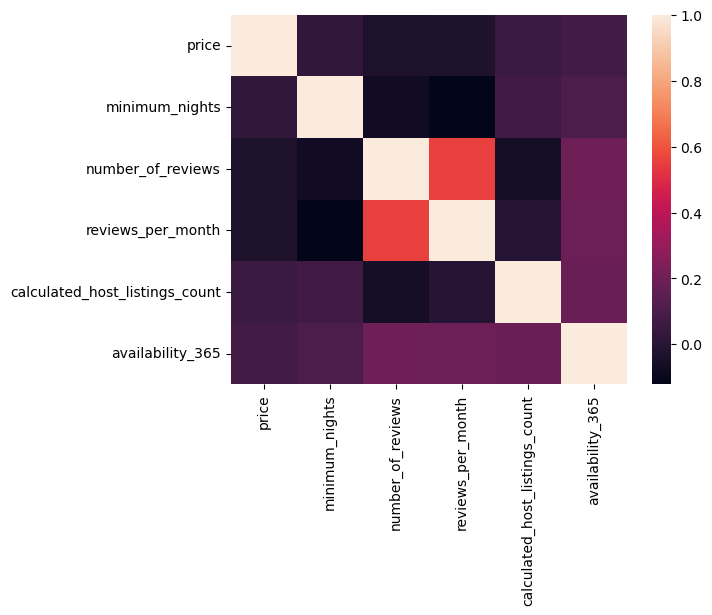

In [41]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

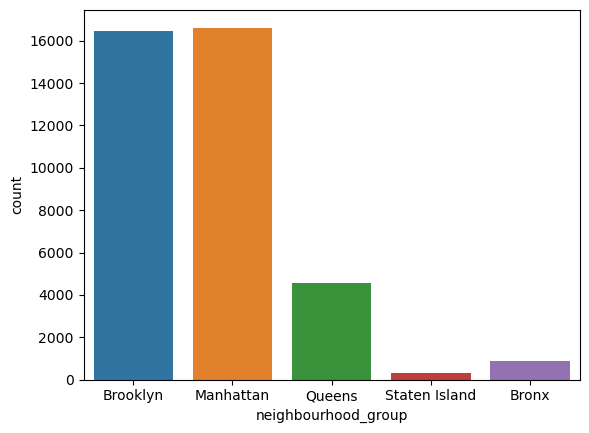

In [43]:
sns.countplot(x = df['neighbourhood_group'])

C:\Users\gumma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='room_type', ylabel='count'>

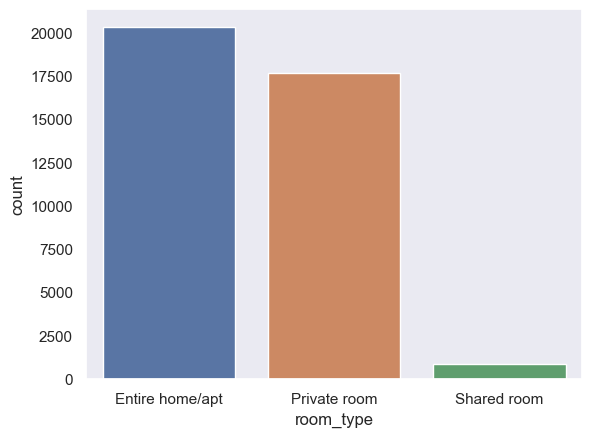

In [65]:
sns.set(style= 'dark')
sns.countplot(df['room_type'] , order = df['room_type'].value_counts().index)

In [58]:
df['room_type'].value_counts()

Entire home/apt    20321
Private room       17654
Shared room          846
Name: room_type, dtype: int64

C:\Users\gumma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='room_type', ylabel='count'>

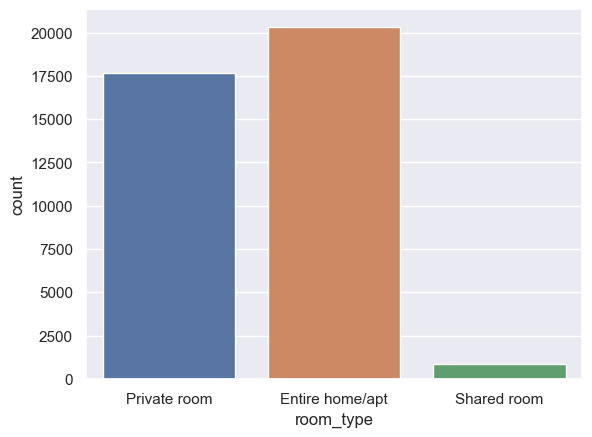

In [59]:
sns.countplot(df['room_type'] )

In [62]:
df['room_type'].value_counts().index

Index(['Entire home/apt', 'Private room', 'Shared room'], dtype='object')

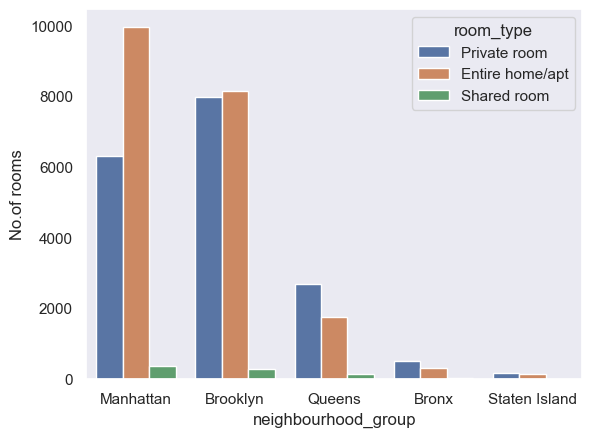

In [81]:
ax = sns.countplot(x = df['neighbourhood_group'] , hue = df['room_type'] , order = df['neighbourhood_group'].value_counts().index)
plt.ylabel('No.of rooms')
plt.show()

<AxesSubplot:ylabel='room_type'>

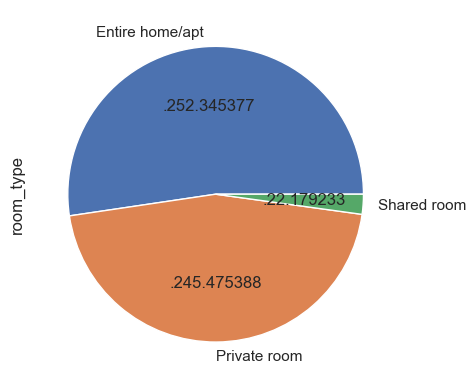

In [89]:
df['room_type'].value_counts().plot(kind = 'pie',autopct='.2%f')

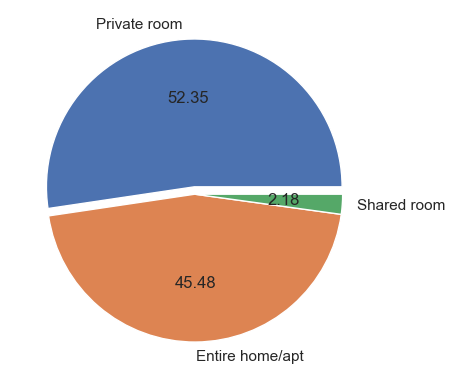

In [112]:
plt.pie(x=df['room_type'].value_counts() , labels = df['room_type'].unique() , autopct ="%.2f"  , explode = [0.05,0,0])
plt.show()

In [113]:
df2 = sns.load_dataset('titanic')

In [114]:
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


C:\Users\gumma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

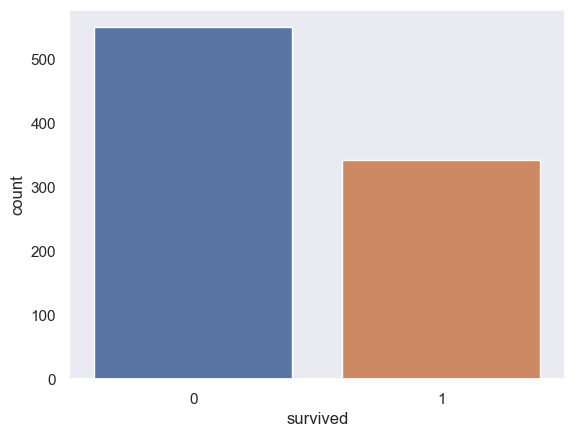

In [115]:
sns.countplot(df2['survived'])

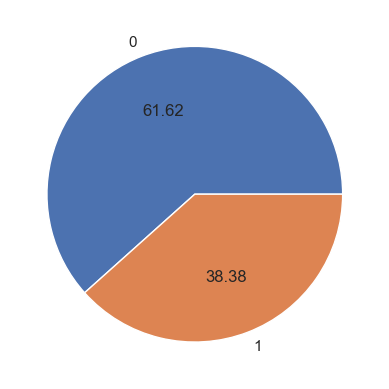

In [163]:

ax =plt.pie(x=df2['survived'].value_counts() , labels = df2['survived'].value_counts().index , autopct = "%.2f" )
plt.show()

In [130]:
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


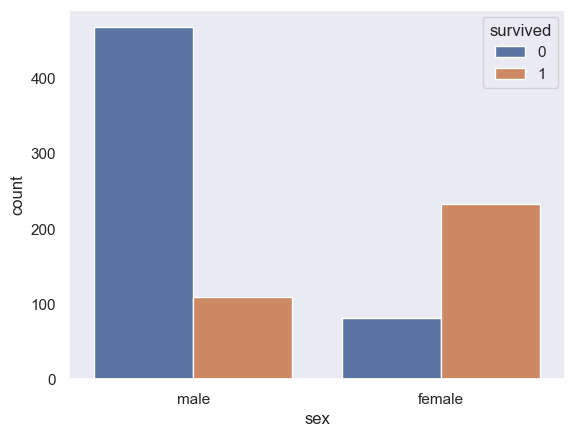

In [134]:
plt.ylabel('No. of people survived')
ax = sns.countplot(data = df2 , x = df2['sex'] , hue = df2['survived'])

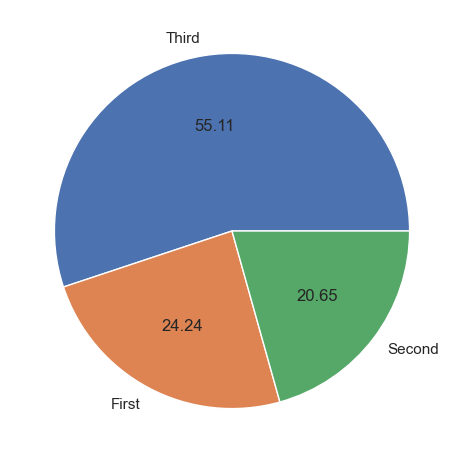

In [143]:

plt.pie(x = df2['class'].value_counts() ,labels = df2['class'].unique() , autopct = '%.2f' )
plt.tight_layout()

plt.show()

In [144]:
df.sample()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
10886,8398566,Room in 1-Br by Columbus Circle,43779028,Allan,Manhattan,Upper West Side,40.76974,-73.98743,Private room,90,2,2,2016-01-03,0.05,1,0


In [146]:
df.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                           object
longitude                          object
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

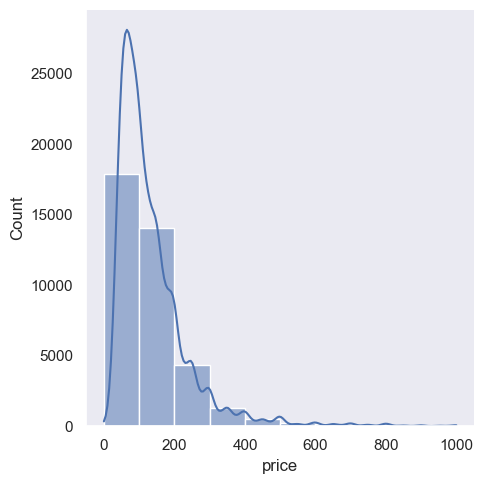

In [166]:

ax =  sns.displot(data = df[df['price'] < 1000] , x = 'price' , bins = 10 , kde = True)
plt.show()

C:\Users\gumma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

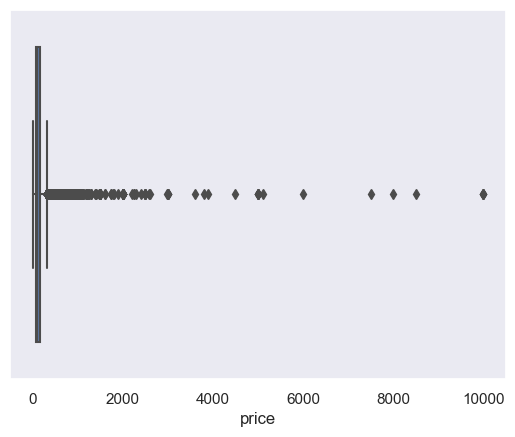

In [167]:
sns.boxplot(df['price'])

C:\Users\gumma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='availability_365'>

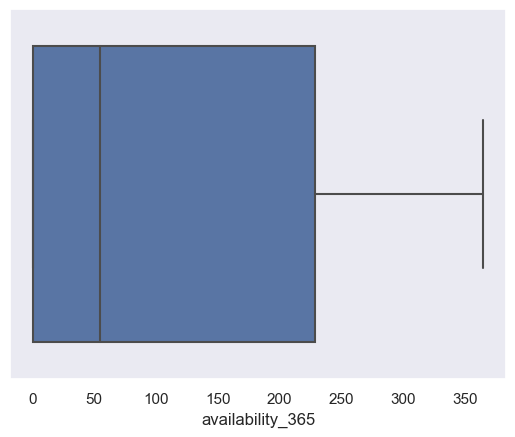

In [168]:
sns.boxplot(df['availability_365'])